In [112]:
!pip install scipy librosa numpy

Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/


In [42]:
def spectrum(audio_file):
  import librosa
  import matplotlib.pyplot as plt
  import numpy

  # Load the audio file
  audio, sr = librosa.load(audio_file)

  # Preprocess the audio (optional)
  audio = librosa.resample(audio, sr, 8000)

  # Calculate the Fourier transform
  fourier = numpy.fft.fft(audio)

  # Convert the frequency spectrum to Mel-scaled frequencies
  mel_frequencies = librosa.mel_frequencies(n_mels=128)

  # Calculate the Mel-scaled spectrogram
  mel_spectrogram = librosa.feature.melspectrogram(y=audio, sr=sr, n_mels=128)

  # Display the Mel-scaled spectrogram
  plt.imshow(mel_spectrogram, aspect='auto', origin='lower')
  
  plt.show()
  return mel_spectrogram


/usr/local/lib/python3.8/dist-packages/librosa/core/audio.py:165: UserWarning: PySoundFile failed. Trying audioread instead.
  warnings.warn("PySoundFile failed. Trying audioread instead.")


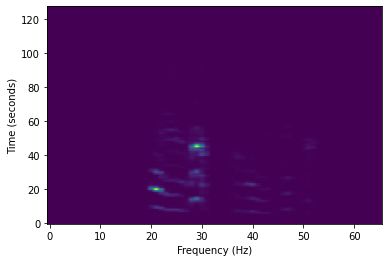

/usr/local/lib/python3.8/dist-packages/librosa/core/audio.py:165: UserWarning: PySoundFile failed. Trying audioread instead.
  warnings.warn("PySoundFile failed. Trying audioread instead.")


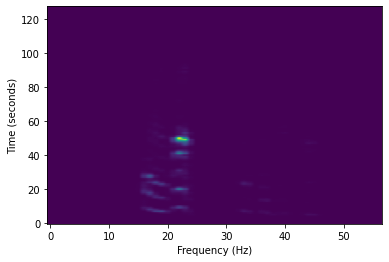

/usr/local/lib/python3.8/dist-packages/librosa/core/audio.py:165: UserWarning: PySoundFile failed. Trying audioread instead.
  warnings.warn("PySoundFile failed. Trying audioread instead.")


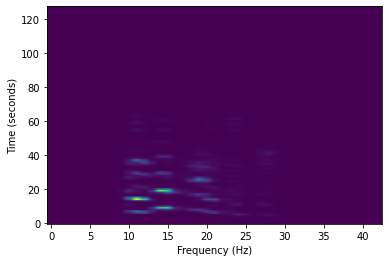

/usr/local/lib/python3.8/dist-packages/librosa/core/audio.py:165: UserWarning: PySoundFile failed. Trying audioread instead.
  warnings.warn("PySoundFile failed. Trying audioread instead.")


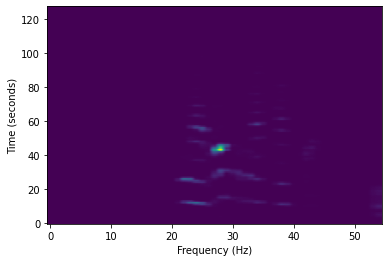

In [94]:
spec1 = spectrum("./sample_data/voice_mic1.m4a")
spec2 = spectrum("./sample_data/voice_mic2.m4a")
spec3 = spectrum("./sample_data/voice_mic3.m4a")
spec4 = spectrum("./sample_data/oli_voice1.m4a")

In [4]:
import librosa
import numpy as np

def calculate_fingerprint(audio_file, num_coeffs=5):


  # Calculate the linear predictive coefficients (LPCs) for the audio signal
  audio, sr = librosa.load(audio_file)
  lpcs = librosa.lpc(audio, num_coeffs)

  def round_array(x, round_to):
    # Round each element in the array to the nearest round_to value
    rounded_array = [round(n * (1 / round_to)) * round_to for n in x]
    return rounded_array

  
  return round_array(lpcs, 0.5)[:3]



In [5]:

print("mic", calculate_fingerprint('./sample_data/voice_mic1.m4a'))
print("mic", calculate_fingerprint('./sample_data/voice_mic2.m4a'))
print("mic", calculate_fingerprint('./sample_data/voice_mic3.m4a'))
print("not mic", calculate_fingerprint('./sample_data/voice_mic4.m4a'))
print("oli", calculate_fingerprint('./sample_data/oli_voice1.m4a'))
print("jo", calculate_fingerprint('./sample_data/voice_jo1.m4a'))


/usr/local/lib/python3.8/dist-packages/librosa/core/audio.py:165: UserWarning: PySoundFile failed. Trying audioread instead.
  warnings.warn("PySoundFile failed. Trying audioread instead.")


mic [1.0, -1.0, 0.5]


/usr/local/lib/python3.8/dist-packages/librosa/core/audio.py:165: UserWarning: PySoundFile failed. Trying audioread instead.
  warnings.warn("PySoundFile failed. Trying audioread instead.")


mic [1.0, -1.5, 0.5]
mic [1.0, -1.5, 0.5]


/usr/local/lib/python3.8/dist-packages/librosa/core/audio.py:165: UserWarning: PySoundFile failed. Trying audioread instead.
  warnings.warn("PySoundFile failed. Trying audioread instead.")
/usr/local/lib/python3.8/dist-packages/librosa/core/audio.py:165: UserWarning: PySoundFile failed. Trying audioread instead.
  warnings.warn("PySoundFile failed. Trying audioread instead.")


not mic [1.0, -1.0, 0.0]


/usr/local/lib/python3.8/dist-packages/librosa/core/audio.py:165: UserWarning: PySoundFile failed. Trying audioread instead.
  warnings.warn("PySoundFile failed. Trying audioread instead.")


oli [1.0, -1.5, 1.0]


/usr/local/lib/python3.8/dist-packages/librosa/core/audio.py:165: UserWarning: PySoundFile failed. Trying audioread instead.
  warnings.warn("PySoundFile failed. Trying audioread instead.")


jo [1.0, -1.5, 1.5]
